# Multi parameter models
startingt his ch3 NMR example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm

%matplotlib inline
sns.set(font_scale=1.5)

In [2]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45,
52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33,
57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99,
52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84,
53.16])

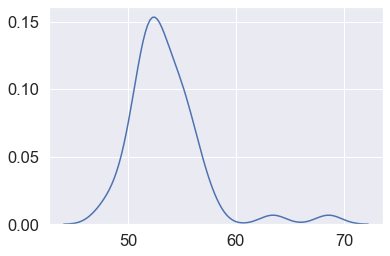

In [3]:
sns.kdeplot(data)

In [8]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1100, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 6400/6400 [00:01<00:00, 4296.69draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a386ede50>,
      dtype=object)

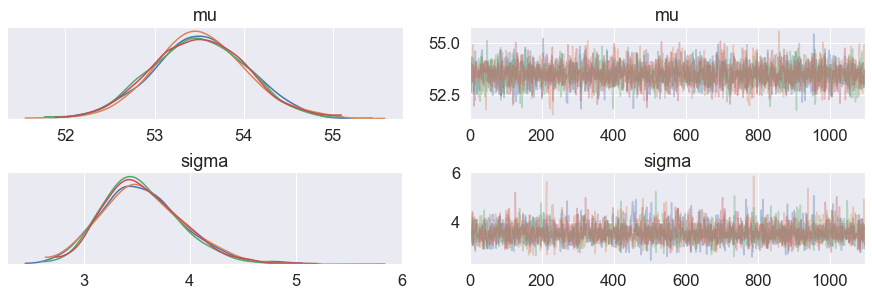

In [9]:
pm.traceplot(trace_g)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a387da910>,
      dtype=object)

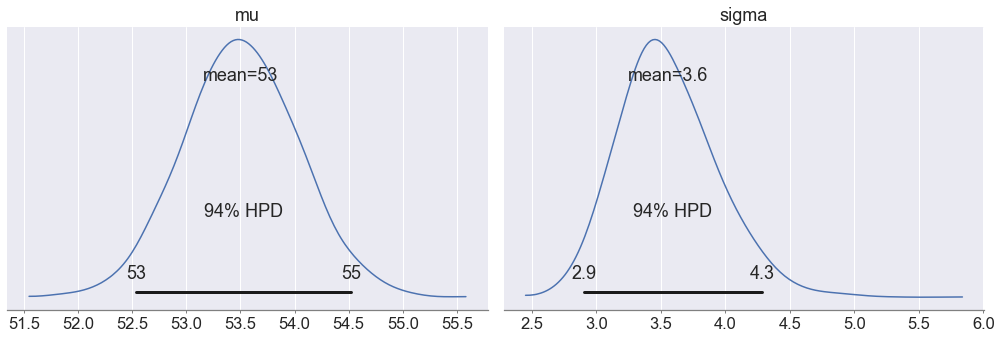

In [11]:
pm.plot_posterior(trace_g)

In [12]:
pm.summary(trace_g)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.498401,0.527612,0.007463,52.489643,54.550422,4125.384536,1.000013
sigma,3.552864,0.380939,0.006333,2.857691,4.305856,3649.234419,1.000209


/Users/balarsen/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 100/100 [00:00<00:00, 973.91it/s]


Text(0.5, 0, '$x$')

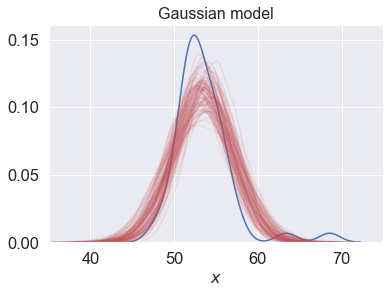

In [19]:
y_pred = pm.sample_ppc(trace_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i.flatten(), c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$x$', fontsize=16)

In [18]:
y_pred['y'].shape

(100, 48, 48)

In [22]:
(stats.iqr(data)+data.mean())*1.5

85.31093750000001

## Look at students-t dist

In [23]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

0.15427608081517086

In [31]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(5100, chains=8)
chain_t = trace_t[100:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [nu, sigma, mu]
Sampling 8 chains: 100%|██████████| 84800/84800 [00:30<00:00, 2818.68draws/s]
The acceptance probability does not match the target. It is 0.8830519721214525, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8787489954578583, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99fc088850>,
      dtype=object)

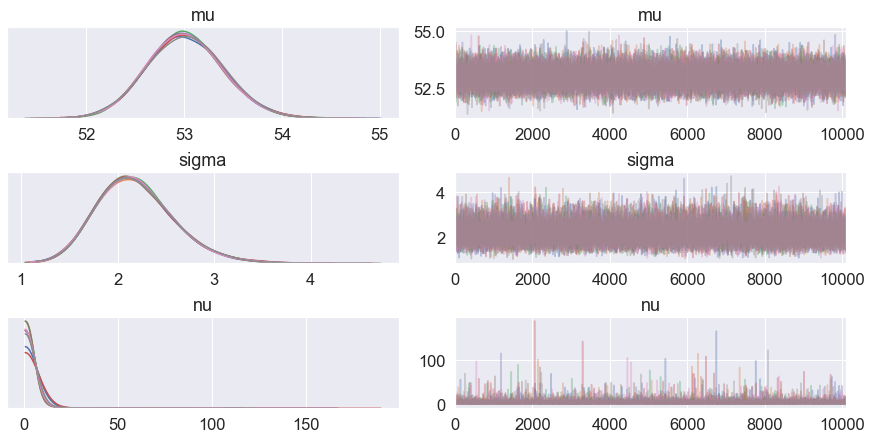

In [32]:
pm.traceplot(trace_t)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a0bc70150>,
      dtype=object)

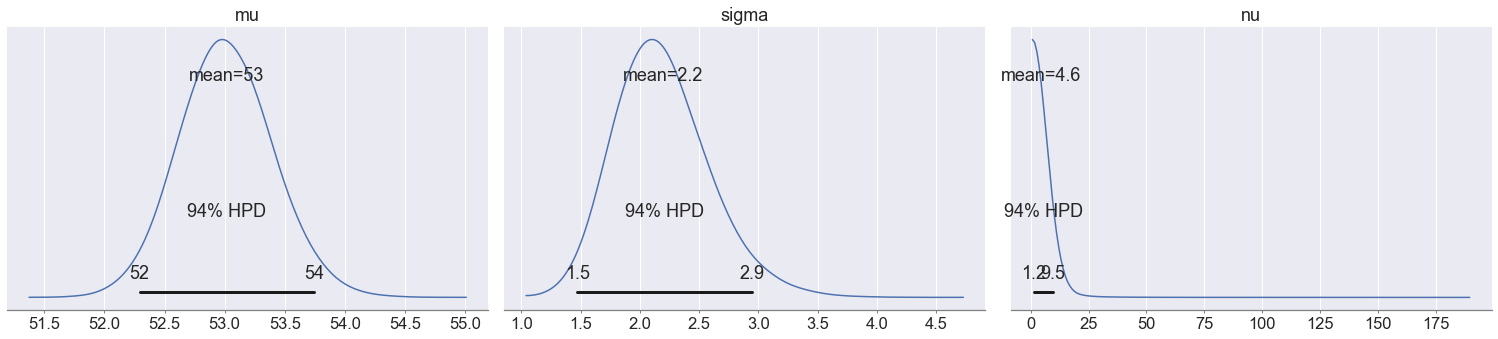

In [33]:
pm.plot_posterior(trace_t)

In [34]:
pm.summary(trace_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.013970,0.385711,0.001518,52.270750,53.786008,55043.116055,1.000071
sigma,2.192517,0.396714,0.001810,1.454511,2.989008,40335.554727,1.000055
nu,4.634511,4.198292,0.023733,1.069904,10.041432,29163.158997,1.000147


/Users/balarsen/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 100/100 [00:00<00:00, 1018.80it/s]


Text(0.5, 0, '$x$')

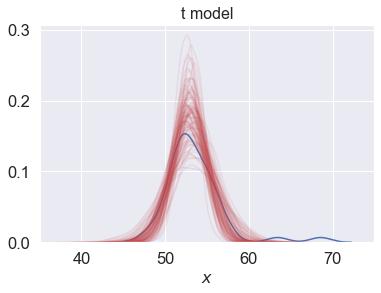

In [36]:
y_pred = pm.sample_ppc(trace_t, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i.flatten(), c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('t model', fontsize=16)
plt.xlabel('$x$', fontsize=16)